# Exporación de los datos

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [3]:
def read_data(file_path):
    """
    Reads a CSV file and returns a DataFrame.
    
    Parameters:
    file_path (str): The path to the CSV file.
    
    Returns:
    pd.DataFrame: The DataFrame containing the data.
    """
    try:
        # Try reading with UTF-8 encoding first
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        # If UTF-8 fails, try with latin-1 encoding
        print(f"UTF-8 encoding failed for {file_path}, trying latin-1...")
        return pd.read_csv(file_path, encoding='latin-1')

def display_data_info(df):
    """
    Displays basic information about the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    print("DataFrame Info:")
    print(df.info())
    print("DataFrame Description:")
    print(df.describe())
    print("DataFrame Missing Values:")
    print(df.isna().sum())
    print("\nFirst 2 rows:")
    print(df.head(2))

In [4]:
data_path = os.path.join(os.getcwd(), "data")
dfs = {}
for file in os.listdir(data_path):
    if file.endswith(".csv"):
        file_path = os.path.join(data_path, file)
        print(f"Processing file: {file}")
        df = read_data(file_path)
        display_data_info(df)
        dfs[file] = df

Processing file: producto.csv
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12026 non-null  int64  
 1   categoria_id  10998 non-null  float64
 2   nombre        12026 non-null  object 
 3   marca_id      11150 non-null  float64
 4   volumen       12026 non-null  int64  
 5   precio        12020 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 563.8+ KB
None
DataFrame Description:
                  id  categoria_id      marca_id        volumen        precio
count   12026.000000  10998.000000  11150.000000   12026.000000  12020.000000
mean   233928.299850     23.148663     41.812735    1033.562448     38.770502
std    133810.910123     20.469181     62.779059    4717.072506    309.980074
min        15.000000      1.000000      1.000000       0.000000      0.000000
25%    117674.750000

In [5]:
for key, df in dfs.items():
    print(f"File: {key}")
    print(df.drop_duplicates().shape[0], df.shape[0])

File: producto.csv
12026 12026
File: categoria.csv
101 101
File: marca.csv
307 307
File: events.csv
2755641 2756101
File: cliente.csv
11720 12000


In [6]:
def display_distributions_stats(df):
    """
    Displays the distribution of numerical columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    print("DataFrame Description:")
    print(df.describe())
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numerical_cols:
        if not re.search(r'(id|timestamp)', col):
            plt.figure(figsize=(10, 5))
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
            
            precio = pd.to_numeric(df[col], errors='coerce')
            precio = precio.replace([np.inf, -np.inf], np.nan).dropna()

            print("Count of valid:", len(precio))
            print("First 5 values:", precio.head())

            if len(precio) > 0:
                plt.figure(figsize=(10, 5))
                plt.boxplot(precio, vert=False)
                plt.title(f'Boxplot of {col}')
                plt.xlabel(col)
                plt.show()
            else:
                print("No valid numeric data to plot for column:", col)
    not_numerical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    for col in not_numerical_cols:
        if not re.search(r'(nombre|apellido|correo|telefono|nit|marca|categoria)', col):
            df[col] = df[col].astype('category')
            if df[col].nunique() > 20:
                value_counts = df[col].value_counts(dropna=True)
                top_20 = value_counts[:20]
                other_sum = value_counts[20:].sum()
                if other_sum > 0:
                    top_20['Other'] = other_sum
                data_to_graph = top_20
                print(data_to_graph)
                plt.figure(figsize=(10, 5))
                sns.barplot(y=data_to_graph.index, x=data_to_graph.values)
                plt.title(f'Distribution of {col} (Top 20 + Other)')
                plt.xlabel('Count')
                plt.ylabel(col)
                plt.show()
                plt.figure(figsize=(10, 5))
                plt.pie(data_to_graph.values, labels=data_to_graph.index, autopct='%1.1f%%')
                plt.title(f'Pie Chart of {col} (Top 20 + Other)')
                plt.show()
            else:
                plt.figure(figsize=(10, 5))
                sns.countplot(y=df[col])
                plt.title(f'Distribution of {col}')
                plt.xlabel('Count')
                plt.ylabel(col)
                plt.show()
                plt.figure(figsize=(10, 5))
                plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
                plt.title(f'Pie Chart of {col}')
                plt.show()

File: producto.csv
DataFrame Description:
                  id  categoria_id      marca_id        volumen        precio
count   12026.000000  10998.000000  11150.000000   12026.000000  12020.000000
mean   233928.299850     23.148663     41.812735    1033.562448     38.770502
std    133810.910123     20.469181     62.779059    4717.072506    309.980074
min        15.000000      1.000000      1.000000       0.000000      0.000000
25%    117674.750000      7.000000      7.000000     750.000000      8.250000
50%    234303.500000     18.000000     19.000000     750.000000     14.250000
75%    349531.750000     37.000000     39.000000     750.000000     25.500000
max    466861.000000    101.000000    307.000000  225000.000000   9702.000000


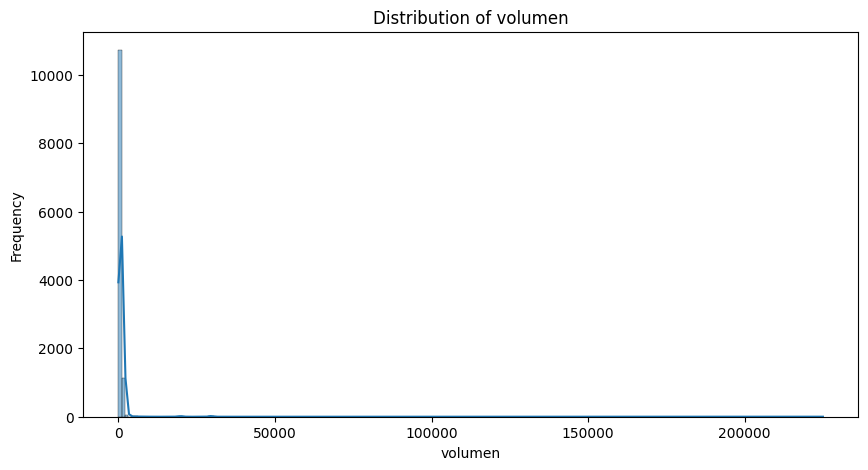

Count of valid: 12026
First 5 values: 0    750
1    300
2    200
3    750
4    300
Name: volumen, dtype: int64


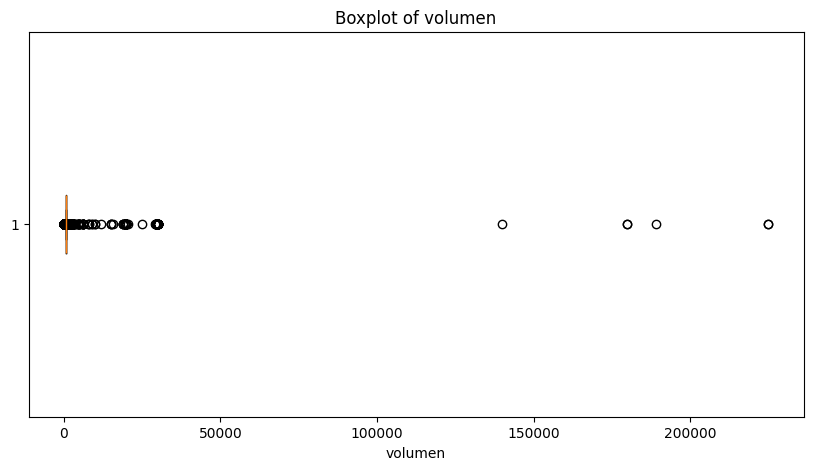

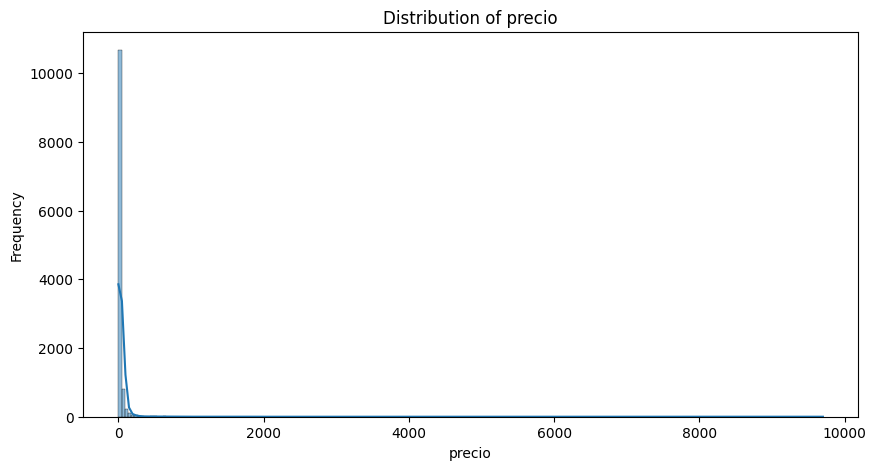

Count of valid: 12020
First 5 values: 0    22.49
1    11.03
2     7.08
3    98.99
4    11.03
Name: precio, dtype: float64


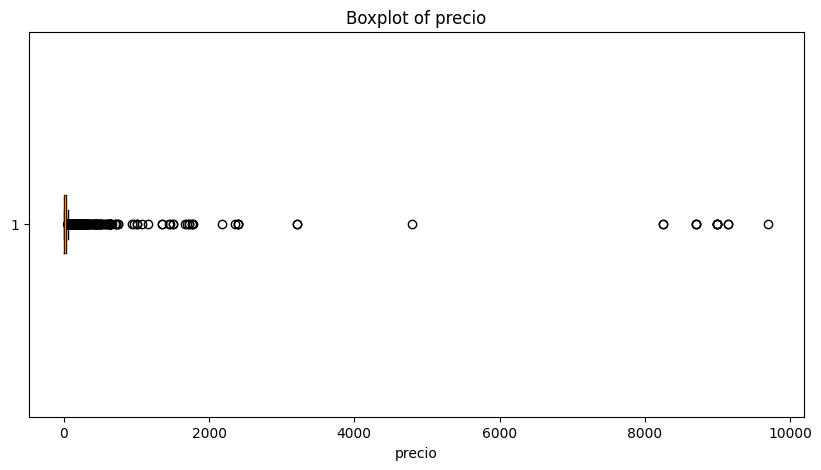

File: categoria.csv
DataFrame Description:
               id
count  101.000000
mean    51.000000
std     29.300171
min      1.000000
25%     26.000000
50%     51.000000
75%     76.000000
max    101.000000
File: marca.csv
DataFrame Description:
               id
count  307.000000
mean   154.000000
std     88.767487
min      1.000000
25%     77.500000
50%    154.000000
75%    230.500000
max    307.000000
File: events.csv
DataFrame Description:
          timestamp     visitorid        itemid  transactionid
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290
min    1.430622e+12  0.000000e+00  3.000000e+00       0.000000
25%    1.433478e+12  3.505660e+05  1.181200e+05    4411.000000
50%    1.436453e+12  7.020600e+05  2.360670e+05    8813.000000
75%    1.439225e+12  1.053437e+06  3.507150e+05   13224.000000
max    1.442545e+12  1.407579e+06  4.668670e+05   

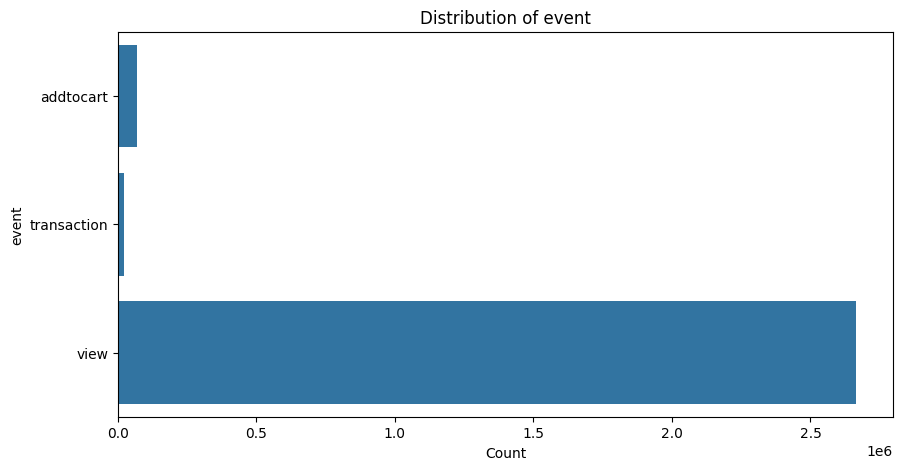

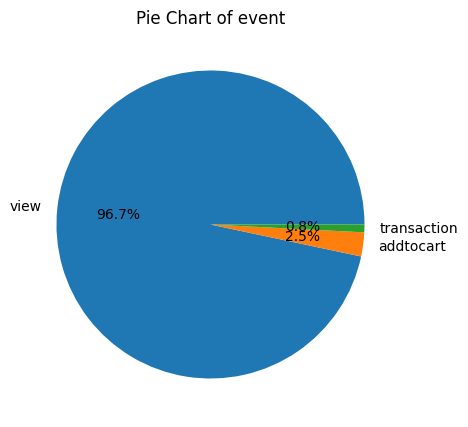

File: cliente.csv
DataFrame Description:
                 id
count  1.171900e+04
mean   7.099856e+05
std    4.058287e+05
min    1.720000e+02
25%    3.591195e+05
50%    7.183140e+05
75%    1.062739e+06
max    1.407398e+06
nacimiento
3/10/93         7
7/10/89         7
3/24/94         7
6/23/97         7
4/11/98         7
8/31/93         7
12/9/97         6
9/18/94         6
2/25/87         6
2/7/86          6
10/10/94        6
5/3/97          6
12/15/91        6
12/3/90         6
7/7/93          6
4/26/92         6
2/7/95          6
12/22/92        6
9/8/96          6
1/19/98         6
Other       11593
Name: count, dtype: int64


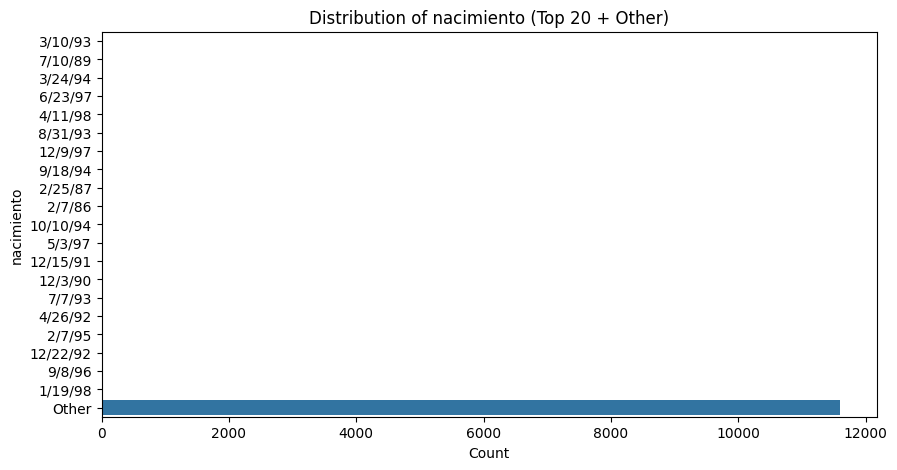

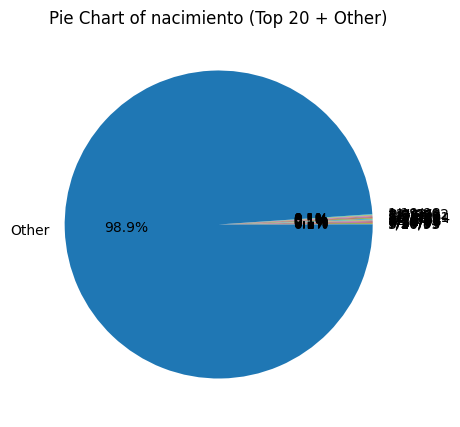

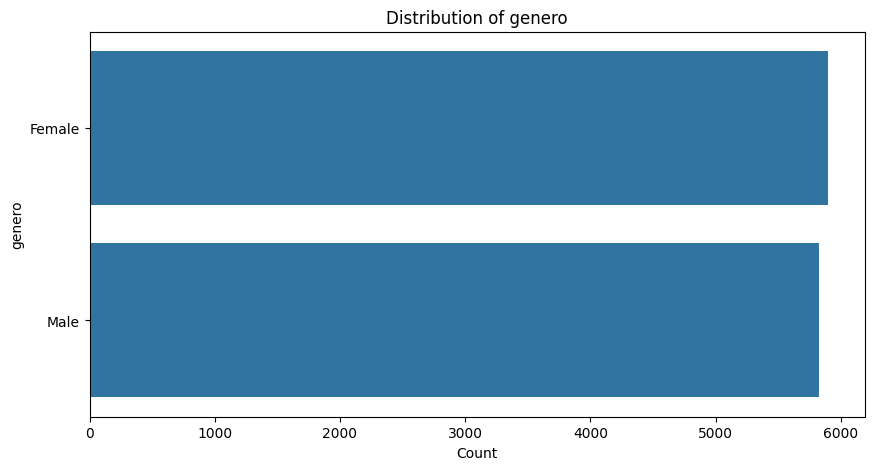

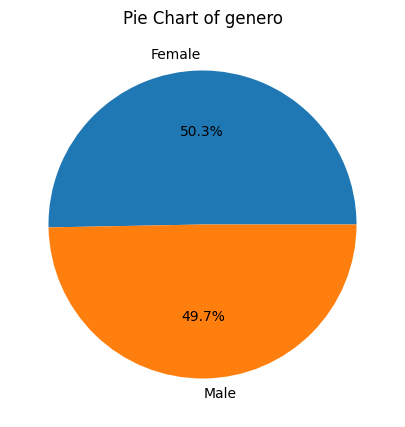

empresa
Voomm              71
Wikizz             65
Jayo               65
Meevee             65
Quinu              65
Skimia             64
Livetube           63
Thoughtstorm       62
Photobug           60
Jabbersphere       57
Dynabox            55
Mynte              54
Realcube           51
Quatz              50
Youspan            49
Katz               48
Wordpedia          47
LiveZ              44
Oyoyo              43
Eabox              43
Other           10598
Name: count, dtype: int64


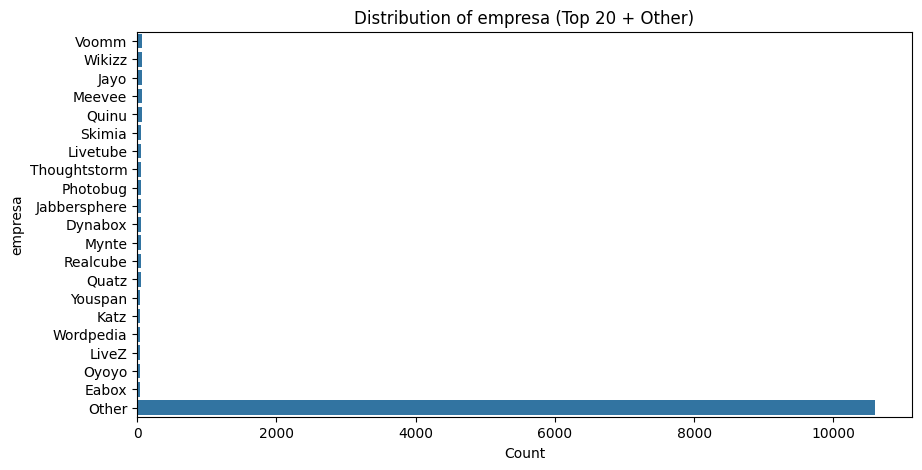

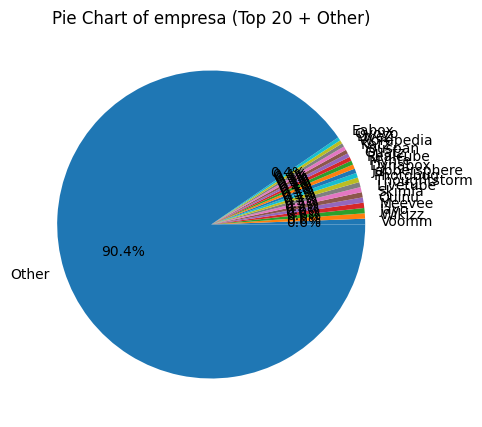

idioma
Mongolian                     143
Dutch                         141
Hungarian                     140
Papiamento                    138
Malayalam                     138
Finnish                       137
Nepali                        136
Quechua                       135
Bosnian                       135
Maltese                       135
Japanese                      134
Aymara                        134
Greek                         133
Hebrew                        133
Tswana                        132
Northern Sotho                132
Swahili                       132
Luxembourgish                 132
Bislama                       131
New Zealand Sign Language     131
Other                        9017
Name: count, dtype: int64


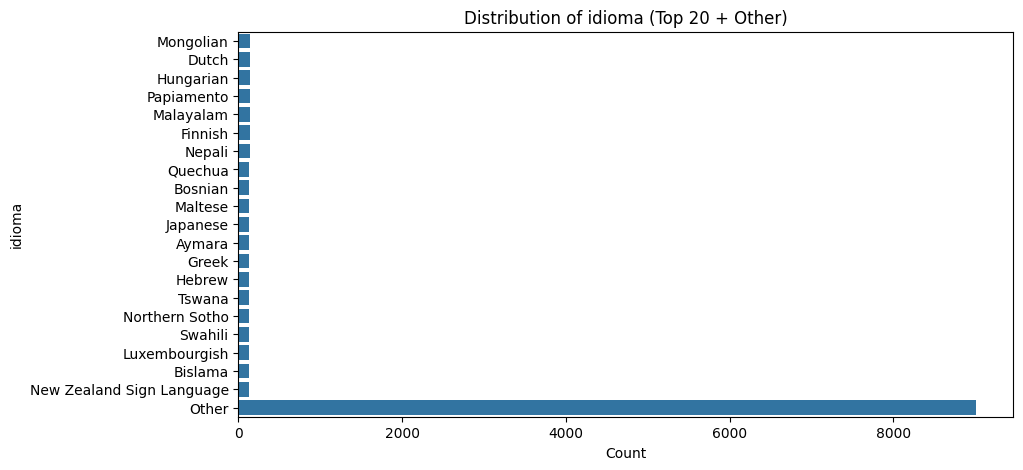

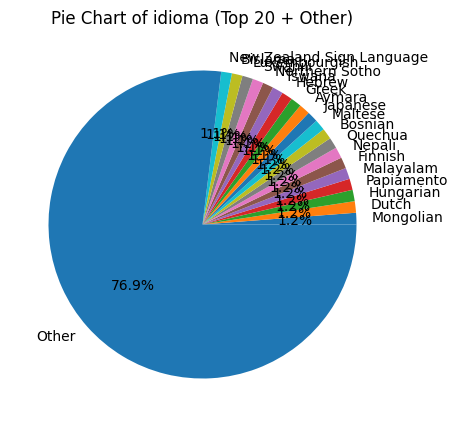

puesto
Compensation Analyst            127
Associate Professor             126
GIS Technical Architect         126
Information Systems Manager     122
Sales Associate                 120
Sales Representative            120
Cost Accountant                 120
Dental Hygienist                119
Food Chemist                    118
Technical Writer                118
Staff Scientist                 117
Executive Secretary             117
Marketing Assistant             116
Financial Advisor               115
Librarian                       114
Environmental Specialist        113
Marketing Manager               113
Nurse                           112
Design Engineer                 111
Account Coordinator             111
Other                          9364
Name: count, dtype: int64


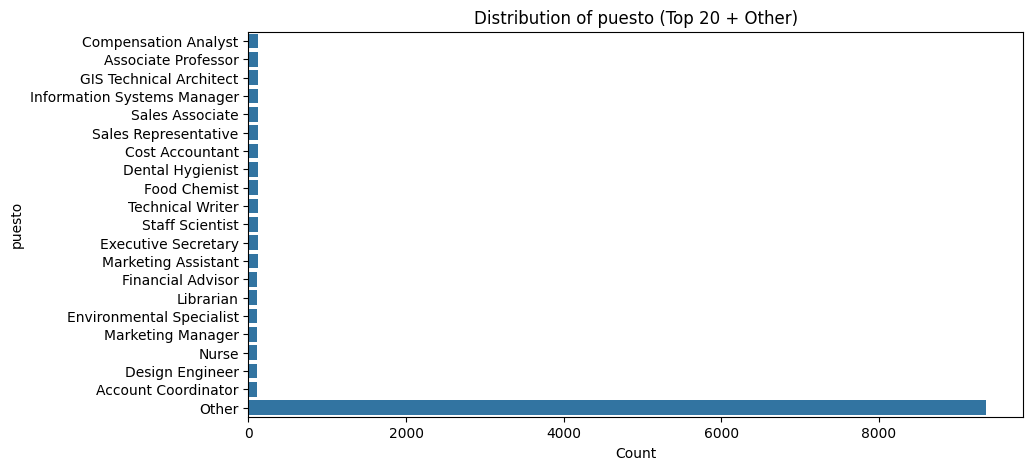

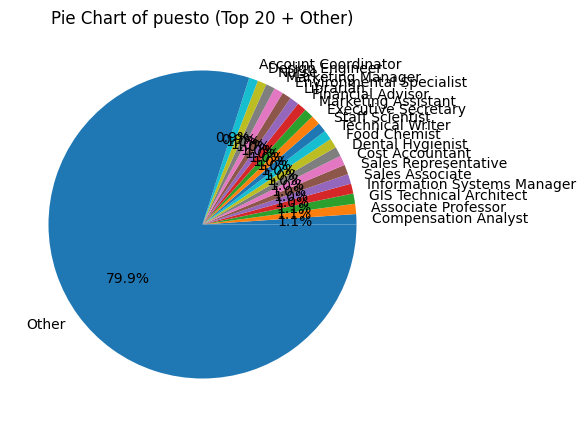

ciudad
Stockholm           22
Oslo                17
GÌ¦teborg           17
San Francisco       10
San Isidro           9
ÌÐrebro              8
Toledo               8
Helsingborg          8
Washington           7
KÌübenhavn           7
Toulouse             7
Nanyang              7
TrollhÌ_ttan         7
Sacramento           7
OrlÌ©ans             7
San Antonio          7
San Juan             7
Guadalupe            7
TyresÌ¦              6
Maoping              6
Other            11538
Name: count, dtype: int64


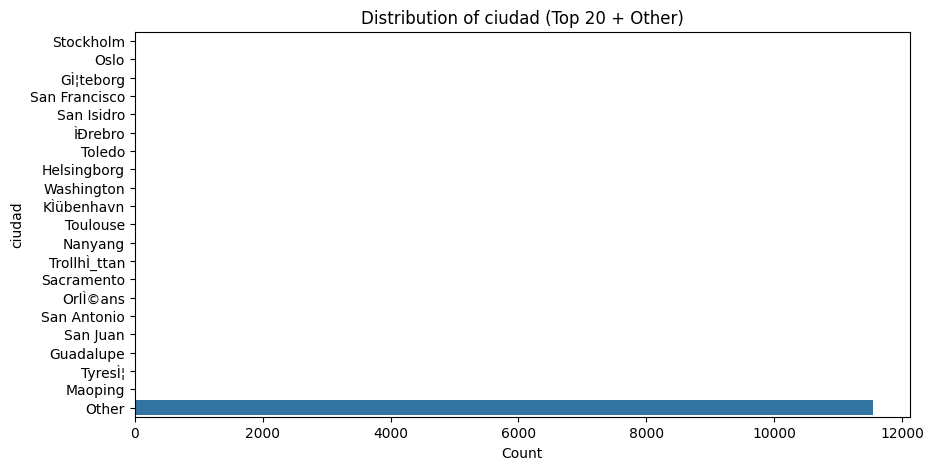

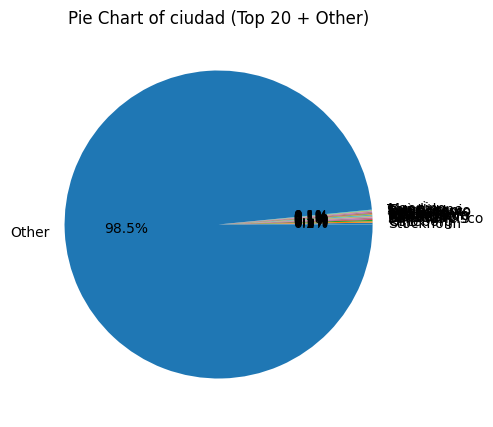

In [7]:
for key, df in dfs.items():
    print(f"File: {key}")
    display_distributions_stats(df)

In [11]:
dfs["producto.csv"].columns

Index(['id', 'categoria_id', 'nombre', 'marca_id', 'volumen', 'precio'], dtype='object')

In [23]:
dfs["cliente.csv"].columns

Index(['id', 'nombre', 'apellido', 'nacimiento', 'genero', 'empresa', 'idioma',
       'nit', 'puesto', 'ciudad', 'correo', 'telefono'],
      dtype='object')

In [ ]:
df_combined = dfs["events.csv"].merge(
    dfs["producto.csv"].merge(
        dfs["categoria.csv"], left_on="categoria_id", right_on="id", how='left'
    ).merge(
        dfs["marca.csv"], left_on="marca_id", right_on="id", how='left'
    ).drop(
        columns=["id_x", "id_y"], axis=1
    ).rename(
        {"id":"producto_id", "nombre":"nombre_producto"}, axis=1
    ), left_on="itemid", right_on="producto_id", how='left'
).merge(
    dfs["cliente.csv"], left_on="visitorid", right_on="id", how='left'
).rename(
    {"id":"cliente_id", "nombre": "nombre_cliente"}, axis=1
).drop(
    columns=["itemid", "visitorid"], axis=1
)

In [36]:
# df_combined[~df_combined["apellido"].isna()]
# df_combined[(~df_combined["precio"].isna()) & (~df_combined["apellido"].isna())]
print("Rows with complete data:", df_combined[(~df_combined["precio"].isna()) & (~df_combined["apellido"].isna())].shape[0], "Total rows:", df_combined.shape[0], "Total interactions with clients:", df_combined.shape[0] - df_combined["apellido"].isna().sum())

Rows with complete data: 5063 Total rows: 2809901 Total interactions with clients: 235633
